In [1]:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

import math
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm
import interpolation 
import numpy as np
import scipy as sc
import scipy.stats as scs
import scipy.integrate as integrate
import scipy.optimize as opt
from scipy.special import erf
import random as rd
import matplotlib.pyplot as plt
import math
ser = Ncm.Serialize.new(0)
Ncm.cfg_init()


In [2]:


cosmo = Nc.HICosmo.new_from_name (Nc.HICosmo, 'NcHICosmoLCDM')
mset = Ncm.MSet ()
mset.set (cosmo)

#
#  Setting parameters Omega_c and w to be fitted.
#
cosmo.props.Omegac_fit = True
cosmo.props.Omegax_fit = True


#
#  Creating a new Distance object optimized to redshift 2.
#
dist = Nc.Distance (zf = 1.0)

#
#  Creating a new Data object from distance modulus catalogs.
#
snia = Nc.DataDistMu.new_from_id (dist, Nc.DataSNIAId.SIMPLE_LEGACY)

#
#  Creating a new Dataset and add snia to it.
#
dset = Ncm.Dataset ()
dset.append_data (snia)

#
#  Creating a Likelihood from the Dataset.
#
lh = Ncm.Likelihood (dataset = dset)

#
#  Creating a Fit object of type NLOPT using the fitting algorithm ln-neldermead to
#  fit the Modelset mset using the Likelihood lh and using a numerical differentiation
#  algorithm (NUMDIFF_FORWARD) to obtain the gradient (if needed).
#
fit = Ncm.Fit.new (Ncm.FitType.NLOPT, "ln-neldermead", lh, mset, Ncm.FitGradType.NUMDIFF_FORWARD)

#
#  Running the fitter printing messages.
##
fit.run (Ncm.FitRunMsgs.SIMPLE)

#
#  Printing fitting informations.
#
fit.log_info ()

#
#  Calculating the parameters covariance using numerical differentiation.
#
fit.numdiff_m2lnL_covar ()

#
#  Printing the covariance matrix.
#
fit.log_covar ()

#----------------------------------------------------------------------------------
# Model fitting. Interating using:
#  - solver:            NLOpt:ln-neldermead
#  - differentiation:   Numerical differentiantion (forward)
#..............
#  Minimum found with precision: |df|/f =  1.00000e-08 and |dx| =  1.00000e-05
#  Elapsed time: 00 days, 00:00:00.1358070
#  iteration            [000057]
#  function evaluations [000059]
#  gradient evaluations [000000]
#  degrees of freedom   [000112]
#  m2lnL     =     110.950175915065 (     110.95018 )
#  Fit parameters:
#     0.265033572430909    0.805064394250513   
#----------------------------------------------------------------------------------
# Data used:
#   - Legacy sample
#----------------------------------------------------------------------------------
# Model[03000]:
#   - NcHICosmo : \Lambda{}CDM
#----------------------------------------------------------------------------------
# Model parameters
#   -      H0[00]:  67.36         

#----------------------------------------------------------------------------------
# Likelihood ratio confidence region at 68.270%, bestfit [  0.26503357   0.80506439]:
#
#  looking root in interval [           0    1.5151948]:
#...
#  root found at    1.3700328 with precision 1.00000000e-02.
#  border found at    1.3700328.
#.
#  looking root in interval [   7.0669608    8.6377572]:
#..
#  root found at    7.8885519 with precision 1.00000000e-02.
#  looking root in interval [   7.1031538    8.6739501]:
#..
#  root found at    7.9022334 with precision 1.00000000e-02.
#  looking root in interval [   7.1168353    8.6876316]:
#..
#  root found at    7.9201518 with precision 1.00000000e-02.
#  looking root in interval [   7.1347536      8.70555]:
#..
#  root found at    7.9373852 with precision 1.00000000e-02.
#  looking root in interval [    7.151987    8.7227834]:
#..
#  root found at     7.954641 with precision 1.00000000e-02.
#  looking root in interval [   7.1692429    8.7400392]:
#.

#  looking root in interval [   8.5553496    10.126146]:
#..
#  root found at     9.365133 with precision 1.00000000e-02.
#  looking root in interval [   8.5797348    10.150531]:
#..
#  root found at    9.3893453 with precision 1.00000000e-02.
#  looking root in interval [   8.6039471    10.174743]:
#..
#  root found at    9.4133719 with precision 1.00000000e-02.
#  looking root in interval [   8.6279737     10.19877]:
#..
#  root found at    9.4372013 with precision 1.00000000e-02.
#  looking root in interval [   8.6518032      10.2226]:
#..
#  root found at    9.4608234 with precision 1.00000000e-02.
#  looking root in interval [   8.6754252    10.246222]:
#..
#  root found at    9.4842292 with precision 1.00000000e-02.
#  looking root in interval [    8.698831    10.269627]:
#..
#  root found at     9.507411 with precision 1.00000000e-02.
#  looking root in interval [   8.7220129    10.292809]:
#..
#  root found at    9.5303626 with precision 1.00000000e-02.
#  looking root in inter

#......
#  root found at    11.080883 with precision 1.00000000e-02.
#  looking root in interval [   10.295485    11.866281]:
#......
#  root found at    11.179049 with precision 1.00000000e-02.
#  looking root in interval [    10.39365    11.964447]:
#......
#  root found at    11.277214 with precision 1.00000000e-02.
#  looking root in interval [   10.491816    12.062612]:
#.......
#  root found at    11.179029 with precision 1.00000000e-02.
#  looking root in interval [   10.393631    11.964427]:
#.......
#  root found at    11.080844 with precision 1.00000000e-02.
#  looking root in interval [   10.295446    11.866242]:
#......
#  root found at    11.179009 with precision 1.00000000e-02.
#  looking root in interval [   10.393611    11.964407]:
#......
#  root found at    11.277174 with precision 1.00000000e-02.
#  looking root in interval [   10.491776    12.062572]:
#.......
#  root found at    11.178988 with precision 1.00000000e-02.
#  looking root in interval [    10.39359    1

#  looking root in interval [   11.772144     13.34294]:
#..
#  root found at    12.574818 with precision 1.00000000e-02.
#  looking root in interval [    11.78942    13.360216]:
#..
#  root found at    12.592254 with precision 1.00000000e-02.
#  looking root in interval [   11.806856    13.377652]:
#..
#  root found at    12.609865 with precision 1.00000000e-02.
#  looking root in interval [   11.824467    13.395263]:
#..
#  root found at    12.627665 with precision 1.00000000e-02.
#  looking root in interval [   11.842267    13.413063]:
#..
#  root found at    12.645668 with precision 1.00000000e-02.
#  looking root in interval [    11.86027    13.431067]:
#..
#  root found at    12.663889 with precision 1.00000000e-02.
#  looking root in interval [   11.878491    13.449287]:
#..
#  root found at    12.682341 with precision 1.00000000e-02.
#  looking root in interval [   11.896943    13.467739]:
#..
#  root found at    12.701037 with precision 1.00000000e-02.
#  looking root in inter

#  looking root in interval [   13.286245    14.857041]:
#..
#  root found at    14.090023 with precision 1.00000000e-02.
#  looking root in interval [   13.304624    14.875421]:
#..
#  root found at    14.108218 with precision 1.00000000e-02.
#  looking root in interval [    13.32282    14.893616]:
#..
#  root found at    14.126243 with precision 1.00000000e-02.
#  looking root in interval [   13.340845    14.911642]:
#..
#  root found at    14.144111 with precision 1.00000000e-02.
#  Start found at [292], ending...


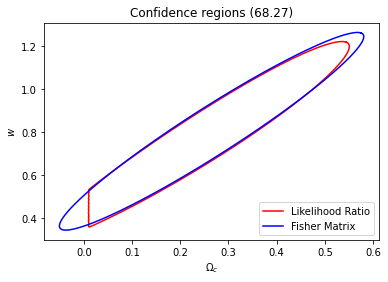

In [3]:
#
#  Creating a new Likelihood ratio test object.
#  First we create two PIndex indicating which parameter
#    we are going to study.
#
p1 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_C)
p2 = Ncm.MSetPIndex.new (cosmo.id (), Nc.HICosmoDESParams.OMEGA_X)

lhr2d = Ncm.LHRatio2d.new (fit, p1, p2, 1.0e-2)



cr_rg = lhr2d.conf_region (0.6827, 300.0, Ncm.FitRunMsgs.SIMPLE)


fisher_rg = lhr2d.fisher_border (0.6827, 300.0, Ncm.FitRunMsgs.SIMPLE)

cr_p1array = cr_rg.p1.dup_array ()
cr_p2array = cr_rg.p2.dup_array ()

fisher_p1array = fisher_rg.p1.dup_array ()
fisher_p2array = fisher_rg.p2.dup_array ()

#
#  Ploting the confidence regions obtained from both methods.
#

plt.title ("Confidence regions (%.2f)" % (cr_rg.clevel * 100.0))
plt.plot (cr_p1array, cr_p2array, 'r', label="Likelihood Ratio")
plt.plot (fisher_p1array, fisher_p2array, 'b-', label="Fisher Matrix")
plt.xlabel(r'$\Omega_c$')
plt.ylabel(r'$w$')

plt.legend(loc=4)
